<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/pair_plots_multivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columnbs from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 14 columns in the data.
---------------------------------------------------------------------------------------------------

  Age Sex Cancer Coronary_heart_disease Depression Smoked_100_cig Education
1  64   1      1                      1          2              1         8
2  37   2      2                      2          2              2         8
3  72   2      2                      2          2              2         5
4  84   2      2                      2          2              2         6
5  31   2      2                      2          2              1         8
6  81   2      1                      2          2              2         4
  Region Anxiety Height Weight Sleep_hours Aerobic.Strength Alcohol_drink_12m
1      3       4     74    235           8                3               108
2      3       3     69    218           9                3                 0
3      3       5     64    240           8                1                12
4     

In [7]:
# Loading in and or installing packages
library(dplyr)
library(ggplot2)
library(zip)
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# Creating a vector for the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")

# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')
# Creating a copy of df
df_copy <- df

# Converting below columns in the df_copy dataframe to factors with original labels.
df_copy$Sex <- factor(df_copy$Sex, labels=c('Male', 'Female'))
df_copy$Cancer <- factor(df_copy$Cancer, labels=c('Yes','No'))
df_copy$Coronary_heart_disease <- factor(df_copy$Coronary_heart_disease, labels = c('Yes', 'No'))
df_copy$Depression <- factor(df_copy$Depression, labels = c('Yes','No'))
df_copy$Smoked_100_cig <- factor(df_copy$Smoked_100_cig, labels = c('Yes', 'No'))
df_copy$Education <- factor(df_copy$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
df_copy$Region <- factor(df_copy$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
df_copy$Anxiety <- factor(df_copy$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
df_copy$`Aerobic.Strength` <- factor(df_copy$`Aerobic.Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))

# Creating colors vector to hold custom hex values for plots
colors <- c("#D62728", "#1F77B4", "#FF7F0E", "#2CA02C",
            "#9467BD", "#8C564B", "#E377C2", "#17BECF",
            "#BCBD22", "#AEC7E8")

# Creating num_index column so ggpairs can know what columns are numerical
num_index <- c(1,10,11,12,14)

# *Pairplots*

What is included in a pairplot can vary based on personal preference. It can contain only numerical variables or include numerical variables grouped by a categorical variable. In this case, we will also be including categorical variables.

The ggpairs function we are using has default settings for what is displayed in the plot. The main diagonal—running from the plot in the first row and first column to the one in the last row and last column—is typically filled with density plots. If a categorical variable is included, the density plots will show the distribution of the numerical variable grouped by category.

The upper triangle (everything above and to the right of the diagonal) includes correlation values between numerical variables. If a categorical variable is present, correlations for each group may also be displayed in addition to the overall correlation.

The lower triangle (everything below and to the left of the diagonal) contains scatterplots of numerical variables. If a categorical variable is included, the points will be color-coded based on category to help visualize group differences.

In [9]:
# Folder to save images
output_folder <- "pair_plots"
dir.create(output_folder, showWarnings = FALSE)


# Loop through every entry in the cat_cols vector
for (cat_v in cat_cols){

      # Code to create pairs plot.
      p <- ggpairs(df_copy, columns = num_index, aes(color=.data[[cat_v]], alpha=0.6), legend=1,
        # Changing size of correlation values
        upper = list(continuous = wrap("cor", size = 6))) +
        # Specifiying colors
        scale_fill_manual(values = colors) +
        scale_color_manual(values = colors) +
        # Customizing title
        ggtitle(paste('Pairwise relationships grouped by', cat_v)) +
        # Adjusting text size, color, and alignment
        theme(legend.text= element_text(size=21),
              legend.title = element_text(size=24),
              strip.text = element_text(size = 16),
              axis.text.x = element_text(size=14, color='black'),
              axis.text.y = element_text(size=14, color='black'),
              plot.title = element_text(hjust=0.5, size=26))


      # Saving ploting to output folder
      filename <- paste0(output_folder, "/","pairsplot_", cat_v, ".png")
      ggsave(filename, plot = p, width = 21, height = 19)

}

# Zip all PNG from output_folder
zip::zip(zipfile = "pairs_plot.zip", files = list.files(output_folder, full.names = TRUE))

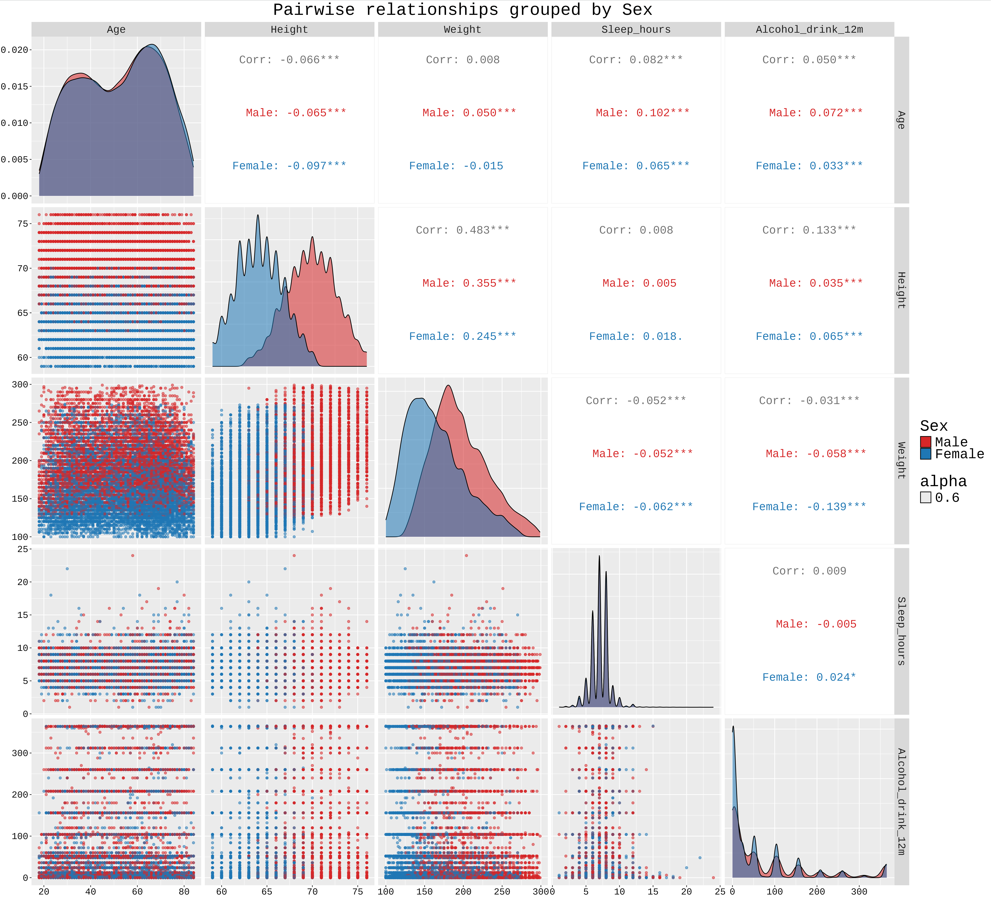

### Density Plots
* Age: Similar distributions for males and females.
* Height: Males show a left skewed distribution, while females show a right-skewed distribution.
* Weight: Right-skewed distribution for both sexes, less pronounced for males.
* Sleep: Similar distributions with overlap between sexes.
* Alcohol: Higher proportion of females reporting zero drinks compared to males

### Correlation Values
* Age-Height: Weak negative for both sexes (stronger for females).
* Age-Weight: Weak positive for males, weak negative for females.
* Age-Sleep: Weak positive for both sexes (stronger for males).
* Age-Alcohol: Weak positive for both sexes (stronger for males).
* Height-Weight: Semi-strong positive for both sexes (stronger for males).
* Height-Sleep: Weak positive for both sexes (stronger for females).
* Height-Alcohol: Weak positive for both sexes (stronger for females).
* Weight-Sleep: Weak negative for both sexes (stronger for females).
* Weight-Alcohol: Weak negative for both sexes (stronger for females).
* Sleep-Alcohol: Weak negative for males, weak positive for females.

### Scatterplots
* Age-Height: No clear sex-based cluster for age; females dominate 59-64 inches range, mix of males and females for 65-70 inches, and males dominate above 70 inches.
* Age-Weight: No clear age-based patterns; females cluster between 100-150 pounds, males become more prevalent above 150 pounds, and males dominate about 250 poounds with some females.
* Age-Sleep: No clear patterns or sex-based clusters.
* Age-Alcohol: No clear age-based patterns; seems more females reporting lower drink counts (around 0 drinks).
* Height-Weight: Strong relationship showing sex-based cluster (females at lower heights/weight, males at higher heights/weights).
* Height-Sleep: No sleep-based clustering; height maintains the previously described distribution.
* Height-Alcohol: No alcohol-based clustering; height maintains the previously described distribution.
* Weight-Sleep: No sleep-based patterns; weight follows the previously described description.
* Weight-Alcohol: No clear patterns for alcohol; weight follows the expected sex-based distribution.
* Sleep-Alcohol: No clear clustering or patterns for these variables.

You can view all the plots at the following link: [Pairplots](https://github.com/Cstan1987stat/health-survey-cluster-analysis/tree/main/graphs/pair_plots).